<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/GP_gamma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# Bibliotecas:

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [134]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [135]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch  

In [136]:
import pyccl as ccl

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JCGoran/GaPP (to revision feature/python3) to /tmp/pip-req-build-ba6n2enl
  Running command git clone --filter=blob:none --quiet https://github.com/JCGoran/GaPP /tmp/pip-req-build-ba6n2enl
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Resolved https://github.com/JCGoran/GaPP to commit 931e4d0e0eb861b01c315e960f74b31a9996aa6f
  Preparing metadata (setup.py) ... done


Vamos reconstruir os dados de f


Optimized hyperparameters:
theta = [0.6962485  2.43808246]


<ipython-input-139-8a86c0d1054f>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')


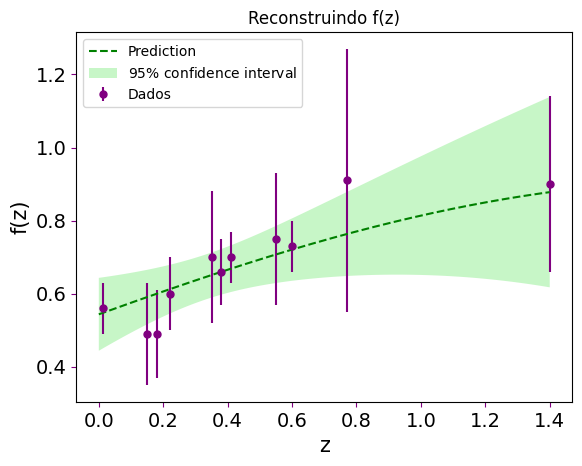

In [139]:
# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_data.csv', delimiter=', ')

z_gapp = data[:, 0]

f_gapp = data[:, 1]

sig_f = data[:, 2]

# nomeando
x_gapp = z_gapp
y_gapp = f_gapp
e = sig_f

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('Reconstruindo f(z)')
plt.show()

# salvando os dados reconstruídos

H = xi, y_pred, sigma
np.savetxt('fz_recon.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("fz_recon.dat")

Vamos fazer a primeira derivada do GaPP de f.


Optimized hyperparameters:
theta = [0.6962342  2.43801101]


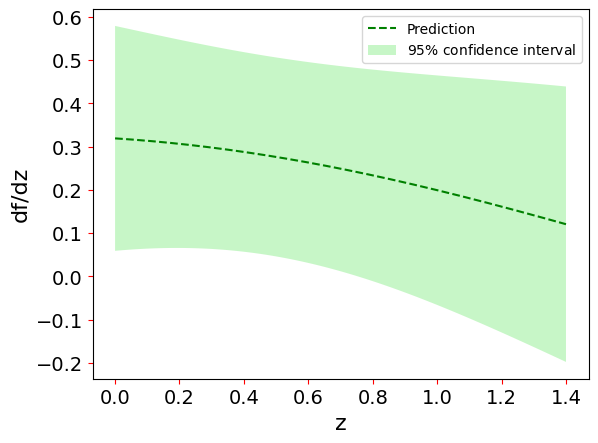

In [140]:
from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_data.csv', delimiter=', ')

z_gapp = data[:, 0]

f_gapp = data[:, 1]

sig_f = data[:, 2]

# nomeando
x_gapp = z_gapp
y_gapp = f_gapp
e = sig_f

xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(thetatrain=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma


# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14,color='red')
plt.plot(xi, y_pred, color='green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('df/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

# salvando os dados reconstruídos

dH = xi, y_pred, sigma
np.savetxt('dfz_recon.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dfz_recon.dat")

Porém, o que realmente queremos plotar é a razão $\frac{1}{f(z)} \frac{df}{dz}$.

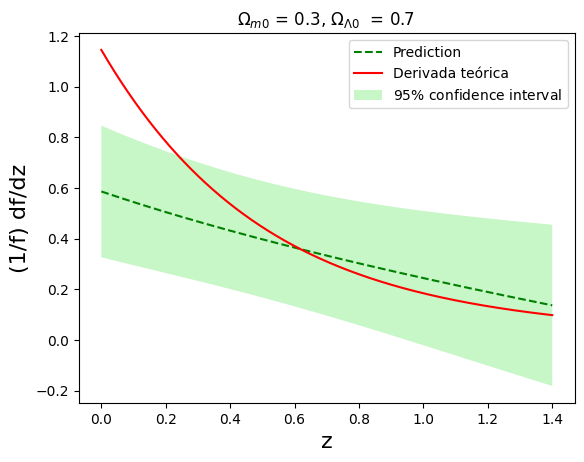

In [141]:
# baixando e nomeando dados
fz = np.genfromtxt('/content/drive/MyDrive/Doutorado/fz_recon.dat', delimiter='\t')

z_dgapp = fz[:, 0]
f_dgapp = fz[:, 1]

ef = fz[:, 2]

dfz = np.genfromtxt('/content/drive/MyDrive/Doutorado/dfz_recon.dat', delimiter='\t')

df = dfz[:, 1]

edf = dfz[:, 2]

df_f = df / f_dgapp

sigma_ff = np.sqrt(((df_f) ** 2) * (((ef / f_dgapp) ** 2) + ((edf / df) ** 2)))



# DERIVADA DO MODELO LCDM

cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649,
    matter_power_spectrum='linear')

zi = np.linspace(0, 1.4, 1000)

ai = 1. / (1. + zi)

gamma = 6/11
Om0 = 0.30
O_L0 = 1 - Om0

derivada_teo = ( (3 * gamma * O_L0)/( (1+zi) * (Om0 * ((1+zi)**3) + O_L0) ) )



# PLOTE
plt.plot(z_dgapp, df_f, color='green', label='Prediction', linestyle="--")
plt.plot(zi, derivada_teo, label='Derivada teórica', color='red')
plt.fill(np.concatenate([z_dgapp, z_dgapp[::-1]]),
         np.concatenate([df_f - 1.9600 * sigma,
                        (df_f + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.title('$\Omega_{m0}$ = 0.3, $\Omega_{\Lambda 0}$  = 0.7 ')
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/f) df/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

H = xi, y_pred, sigma_ff
np.savetxt('df_f_recon_1.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("df_f_recon_1.dat")

Agora, vamos trabalhar com $H(z)$.

No modelo $\Lambda$CDM, vamos considerar:

$H(z) = H_0 \sqrt{\Omega_{m0} (1+z)^3 + \Omega_{\Lambda 0}}$.

Abaixo, vamos fazer o plot desta expressão.

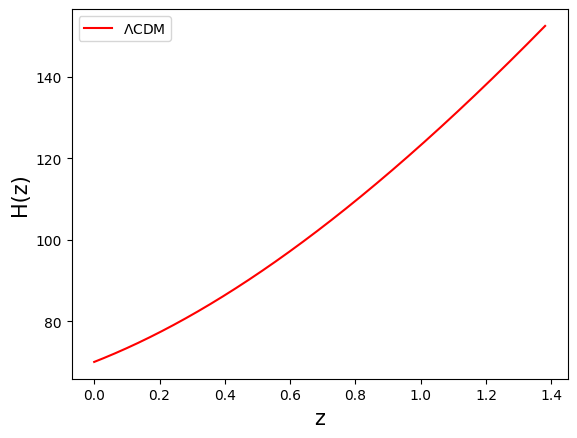

In [142]:
# constantes
Om0 = 0.30
O_L0 = 1 - Om0
h0 = 70 #km/s/Mpc

# MODELO LCDM
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.42, 1, 1000)  # fator de escala

# definindo o redshift em função do fator de escala
z = (1/a) - 1.

h_1 = h0*(np.sqrt(Om0*((1+z)**3) + O_L0 ))

plt.plot(z, h_1, color='red', label='$\Lambda$CDM')
plt.xlabel('z', fontsize=15)
plt.ylabel('H(z)', fontsize=15)
plt.legend(loc='best')
plt.show()

Vamos fazer a derivada do modelo $\Lambda$CDM, considerando $H(z)$ dada pela expressão que plotamos acima.

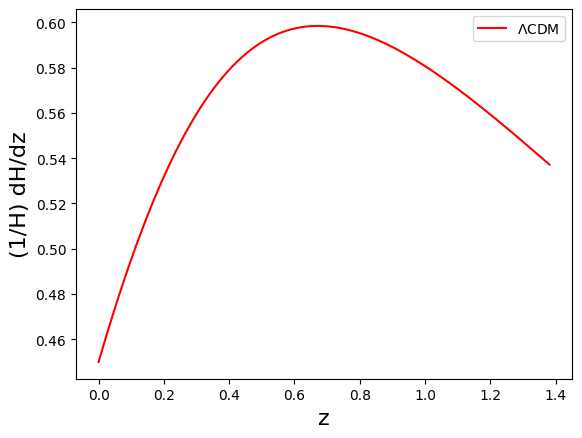

In [143]:
# constantes
Om0 = 0.30
O_L0 = 1 - Om0
h0 = 70 #km/s/Mpc

dh_lcdm = ( (3/2)*h0*Om0*((1+z)**2) )/(np.sqrt(Om0*((1+z)**3) + O_L0 ))

dh_1 = ( (3/2)*Om0*((1+z)**2) )/(Om0*((1+z)**3) + O_L0 )

# plote

plt.plot(z, dh_1, color='red', label='$\Lambda$CDM')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/H) dH/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

Na verdade, queremos obter um ajuste para $\gamma$. Derivando com relação a $z$ a seguinte expressão:

$f = \Omega_m ^\gamma (z)$,

chegamos a

$\frac{f'}{f} = \gamma \frac{\Omega_m '}{\Omega_m}$.

Sabemos que:

$\frac{\Omega_m '}{\Omega_m} = \frac{3}{1+z} - \frac{2H'}{H}$.

Primeiramente, vamos plotar considerando o Modelo $\Lambda$CDM. Estamos considerando $f$ de Linder & Cahn porque sua expressão é uma boa aproximação.

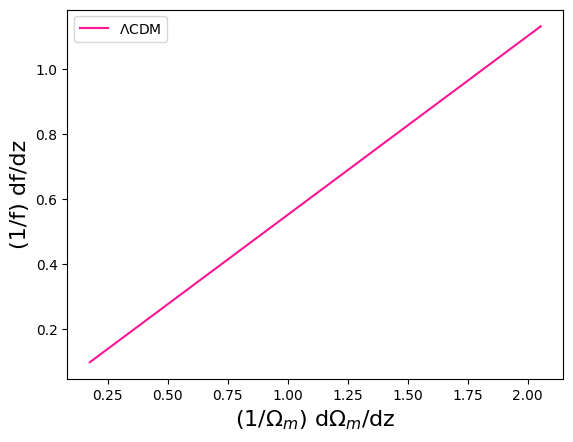

In [144]:
# definindo O_m
Om = (Om0*(a**(-3)))/(Om0*(a**(-3)) + 1 - Om0)
Om0 = 0.315
sigOm0 = 0.007
O_L0 = 1 - Om0
gamma = 0.55

# definindo f conforme linder
f_linder = Om ** gamma

# definindo w0
w0 = -1.028
sig_w0 = 0.031

# derivada de f
derivada_flinder = ( (3 * gamma * O_L0)/( (1+z) * (Om0 * ((1+z)**3) + O_L0) ) )  # aqui já é f'/f

# definindo o erro de f'/f para Om0
df1 = ( -3*gamma*((1+z)**2) )/(( 1 + Om0*z*(z**2 + 3*z + 3) )**2)

# definindo o erro de f'/f para gamma
df2 = ( (3 * O_L0)/( (1+z) * (Om0 * ((1+z)**3) + O_L0) ) )
siggamma = (3/((6*w0 - 5)**2)) * sig_w0

sig_f1 = np.sqrt(((df1)*sigOm0)**2)

# Om'/Om

Omega_m = ccl.background.omega_x(cosmo, a, 'matter')
dOmega_m = np.gradient(Omega_m, z)
dOmega_new = dOmega_m / Omega_m

# PLOTE

plt.plot(dOmega_new, derivada_flinder, color='deeppink', label='$\Lambda$CDM')

# legenda, label e título
plt.xlabel('(1/$\Omega_m$) d$\Omega_m$/dz', fontsize=16)
plt.ylabel('(1/f) df/dz', fontsize=16)
plt.legend()
plt.show()

Vamos baixar os dados de $H(z)$.


Optimized hyperparameters:
theta = [134.94426242   1.98775665]


<ipython-input-145-99eb3e69c966>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x_h, y_h, e, fmt='r.', color='purple', markersize=10, label='Dados')


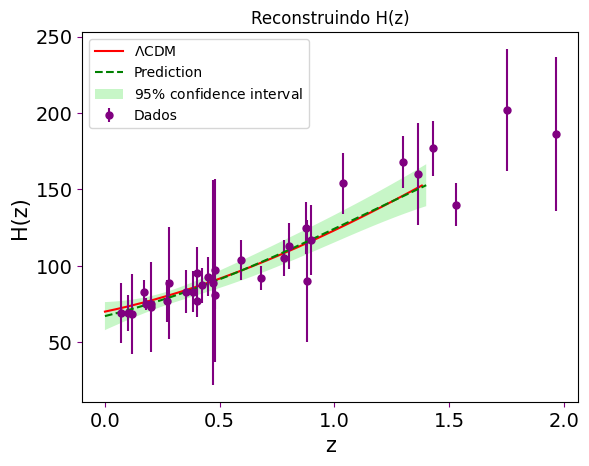

In [145]:
# baixando os dados
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.plot(z, h_1, color='red', label='$\Lambda$CDM')
plt.errorbar(x_h, y_h, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('H(z)', fontsize=15)
plt.legend(loc='best')
plt.title('Reconstruindo H(z)')
plt.show()



# salvando os dados reconstruídos

H = xi, y_pred, sigma
np.savetxt('hz_recon.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("hz_recon.dat")

Vamos fazer a primeira derivada de H usando o GaPP.


Optimized hyperparameters:
theta = [134.94426242   1.98775665]


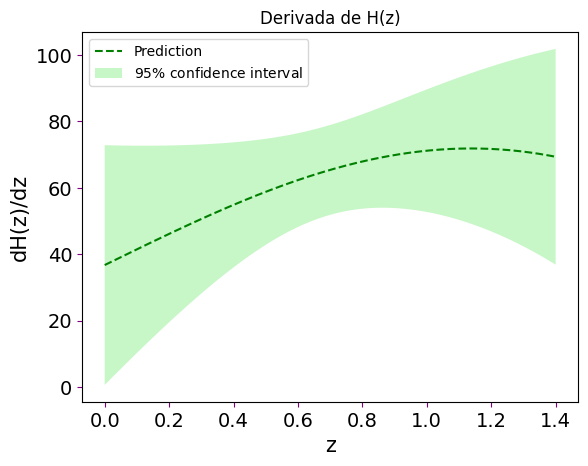

In [146]:
from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# baixando os dados reconstruídos de H
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(theta=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma



# Plot the function, the prediction and the 95% confidence interval 
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('dH(z)/dz', fontsize=15)
plt.legend(loc='best')
plt.title('Derivada de H(z)')
plt.show()

# salvando os dados reconstruídos

dH = xi, y_pred, sigma
np.savetxt('dhz_recon_newz.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dhz_recon_newz.dat")

Porém, o que realmente queremos plotar é a razão $\frac{1}{H(z)} \frac{dH}{dz}$.

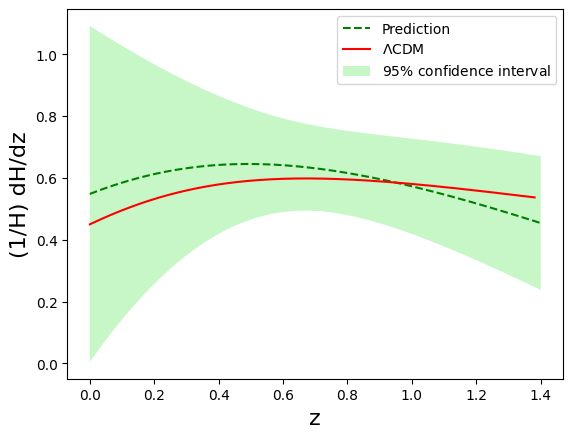

In [147]:
# baixando e nomeando dados reconstruídos de H
hz = np.genfromtxt('/content/hz_recon.dat', delimiter='\t')

z_hz = hz[:, 0]
h_hz = hz[:, 1]

ehz = hz[:, 2]

# baixando e nomeando dados reconstruídos da derivada de H
dhz = np.genfromtxt('/content/dhz_recon_newz.dat', delimiter='\t')

z_dhz = dhz[:, 0]

dh = dhz[:, 1]

edh = dhz[:, 2]

dh_h = dh / h_hz  # H'/H

sigma_H = np.sqrt(((dh_h) ** 2) * (((ehz / h_hz) ** 2) + ((edh / dh) ** 2)))


# PLOTE
plt.plot(z_dhz, dh_h, color='green', label='Prediction', linestyle="--")
plt.plot(z, dh_1, color='red', label='$\Lambda$CDM')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([dh_h - 1.9600 * sigma_H,
                        (dh_h + 1.9600 * sigma_H)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/H) dH/dz', fontsize=16)
plt.legend(loc='best')
plt.show()


# salvando os dados reconstruídos

dH = xi, y_pred, sigma_H
np.savetxt('dh_h_recon_newz.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dh_h_recon_newz.dat")

Usaremos o que obtivemos de $H'/H$ para plotar $\frac{\Omega_m '}{\Omega_m}$.

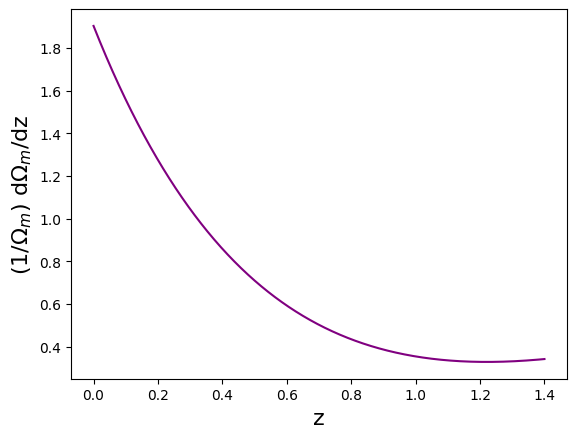

In [148]:
# definindo Om'/Om

dOm_Om = (3/(1+z_dhz)) - (2*dh_h)   #dh_h vem da reconstrução dos dados

eOm = np.sqrt( (2*sigma_H)**2 )

plt.plot(z_dhz, dOm_Om, color='purple')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/$\Omega_m$) d$\Omega_m$/dz', fontsize=16)
plt.show()

Além dos erros relacionados a predição de $H'/H$ e consequentemente $\Omega_m '/ \Omega_m$, vamos considerar também os erros dos parâmetros do modelo $\Lambda$CDM. Faremos um plot para cada parâmetro: $\Omega_{m0}$, $\Omega_{k0}$ e $\omega$. Começaremos por $\Omega_{m0}$.

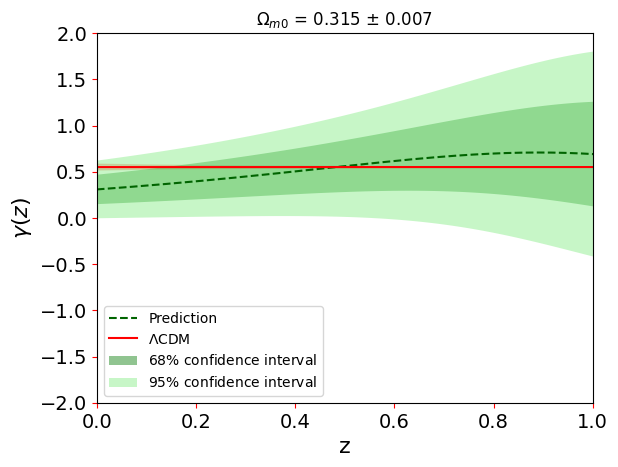

In [149]:
# reconstrução de f'/f
df_f = df / f_dgapp

sigma_ff = np.sqrt(((df_f) ** 2) * (((ef / f_dgapp) ** 2) + ((edf / df) ** 2)))

# reconstrução de Om'/Om
dOm_Om = (3/(1+z_dhz)) - (2*dh_h)   #dh_h vem da reconstrução dos dados

eOm = np.sqrt( (2*sigma_H)**2 )


# gamma LCDM
gamma_lcdm = derivada_flinder / dOmega_new

# erro de gamma do LCDM com relação a Om0
Om0 = 0.315
sigOm0 = 0.007
dg_Om0 = - (gamma_lcdm/( Om0*((1+z)**3) + 1 - Om0 )) - (gamma_lcdm/( 1 + Om0*(z**3 + 3*(z**2) + 3*z) )**2 ) + (gamma_lcdm/( (Om0**2)*((1+z)**3) ) )
sig_glcdm = (dg_Om0)*sigOm0


# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)

# PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.plot(z, gamma_lcdm, color='red', label='$\Lambda$CDM')
ax.fill_between(z, gamma_lcdm - sig_glcdm, gamma_lcdm + sig_glcdm, alpha=0.5, color='salmon')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
plt.title('$\Omega_{m0}$ = 0.315 $\pm$ 0.007')
plt.show()

Faremos agora com $\Omega_{k0}$.

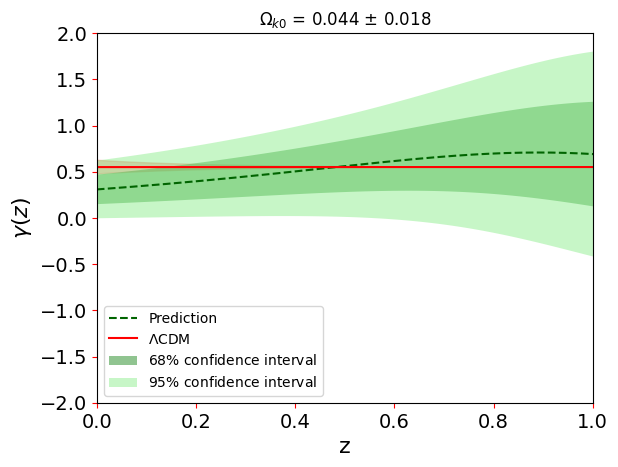

In [150]:
# erro de gamma do LCDM com relação a Om0
Om0 = 0.315
Ok0 = - 0.044
sigOk0 = 0.018
dg_Ok01 = ( gamma_lcdm*((1+z)**2)*(Om0*(z**3) + 3*Om0*(z**2) - 2) )/(3*(Om0*(z**3) + (z**2)*(3*Om0+Ok0) + z*(3*Om0+2*Ok0) + 1 ))
dg_Ok02 = ( 3*gamma_lcdm*(Om0*(z**3) + 3*Om0*(z**2) - 2) )/( ((1+z)**2)*(( (3*Om0*(1+z) + 2*Ok0) )**2) )
dg_Ok0 = dg_Ok01 - dg_Ok02
sig_glcdm1 = (dg_Ok0)*sigOk0


# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)

# PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.plot(z, gamma_lcdm, color='red', label='$\Lambda$CDM')
ax.fill_between(z, gamma_lcdm - sig_glcdm1, gamma_lcdm + sig_glcdm1, alpha=0.5, color='salmon')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
plt.title('$\Omega_{k0}$ = 0.044 $\pm$ 0.018')
plt.show()

Por fim, faremos com $\omega$.

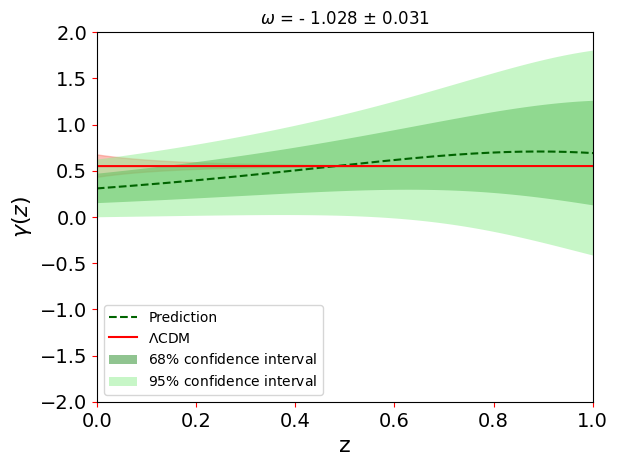

In [151]:
# erro de gamma do LCDM com relação a w0
Om0 = 0.315
O_L0 = 1 - Om0
w = -1.028
sig_w = 0.031
dg_w1 = ( gamma_lcdm*O_L0*((1+z)**(3*w))*(3*Om0*w*np.log(1+z) + O_L0*((1+z)**(3*w)) + Om0) )/( ( O_L0*(1+w)*((1+z)**(3*w)) + Om0)**2 )
dg_w2 = ( gamma_lcdm*(O_L0*((1+z)**(3*w+2)) + 3*O_L0*w*((1+z)**(3*w+2))*np.log(1+z) ) )/( Om0*((1+z)**2) + O_L0*((1+z)**(2+2*w)) )
dg_w3 =( 2*gamma_lcdm*(O_L0**2)*((1+z)**(5*w+4))*np.log(1+z) )/( ( Om0*((1+z)**2) + O_L0*((1+z)**(2+2*w)) )**2 )
dg_w = dg_w1 - dg_w2 + dg_w3
sig_glcdm2 = (dg_w)*sig_w


# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)


# PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.plot(z, gamma_lcdm, color='red', label='$\Lambda$CDM')
ax.fill_between(z, gamma_lcdm - sig_glcdm2, gamma_lcdm + sig_glcdm2, alpha=0.5, color='salmon')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
plt.title('$\omega$ = - 1.028 $\pm$ 0.031')
plt.show()

O erro de $\gamma$ está associado a $\omega$, já que $\gamma$ é dado por (Linder $ Cahn; Basilakos):

$\gamma = \frac{3 (1-\omega)}{5 - 6 \omega}$

Logo, o erro de $\gamma$ no modelo $\Lambda$CDM é:

$\sigma_\gamma ² $ = $\left(\frac{\partial \gamma}{\partial \omega} \right) ^2$ $\sigma_\omega ^2$.

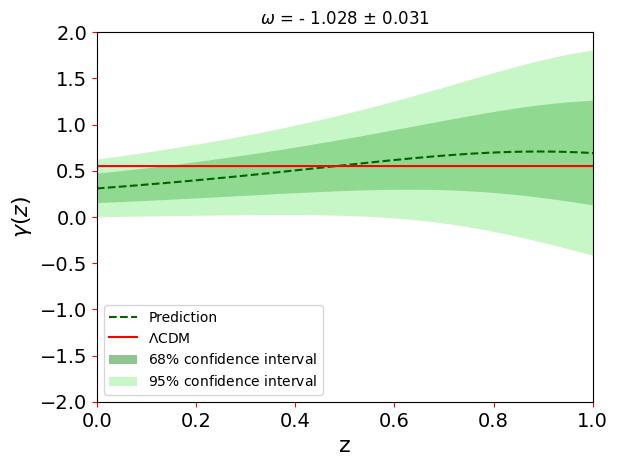

In [152]:
# erro de gamma no modelo LCDM
w = -1.028
sig_w = 0.031
dg_w2 = 3/((5-6*w)**2)

sig_glcdm3 = (dg_w2)*sig_w


# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)


# PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.plot(z, gamma_lcdm, color='red', label='$\Lambda$CDM')
ax.fill_between(z, gamma_lcdm - sig_glcdm3, gamma_lcdm + sig_glcdm3, alpha=0.5, color='salmon')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
plt.title('$\omega$ = - 1.028 $\pm$ 0.031')
plt.show()

Ao considerarmos um $\gamma$ não constante, encontramos uma equação diferencial de primeiro grau, dada por:

$\gamma '$ $ln \left[ \frac{\Omega_{m0} (1+z)^3}{\Omega_{m0} (1+z)^3 + 1 - \Omega_{m0}} \right]$ + $\gamma$ $\left[\frac{3}{1+z} - \frac{2H'}{H} \right]$ - $\frac{f'}{f}$ = 0.

Podemos reescrever a equação acima como:

A(z) $\gamma '$ + B(z) $\gamma$ - C(z) = 0.

Vamos fazer um plot dos coeficientes desta equação por $z$.

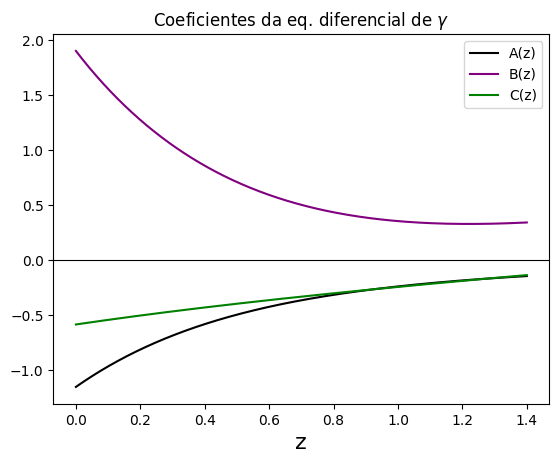

In [153]:
# constantes
Om0 = 0.315

# primeiro coeficiente
A = np.log( (Om0*((1+z_dhz)**3) )/ ( Om0*((1+z_dhz)**3) + 1 - Om0 ) )


# plote
plt.plot(z_dhz, A, color='black', label='A(z)')
plt.plot(z_dhz, dOm_Om, color='purple', label='B(z)')
plt.plot(z_dhz, df_f*(-1), color='green', label='C(z)')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.legend(loc='best')
plt.title('Coeficientes da eq. diferencial de $\gamma$')
#plt.savefig('coeficientes.pdf')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.show()

In [132]:
Om0 = 0.315

def A(z):
  A = np.log( (Om0*((1+z_dhz)**3) )/ ( Om0*((1+z_dhz)**3) + 1 - Om0 ) )
  return A

#print(A(0))  #valor de A quando z=0

def B(z):
  B = dOm_Om
  return B

#print(B(0))  #valor de B quando z=0

def C(z):
  C = df_f*(-1)
  return C

#print(C(0))   #valor de C quando z=0

0.9999999999999999
0.7016800497881971


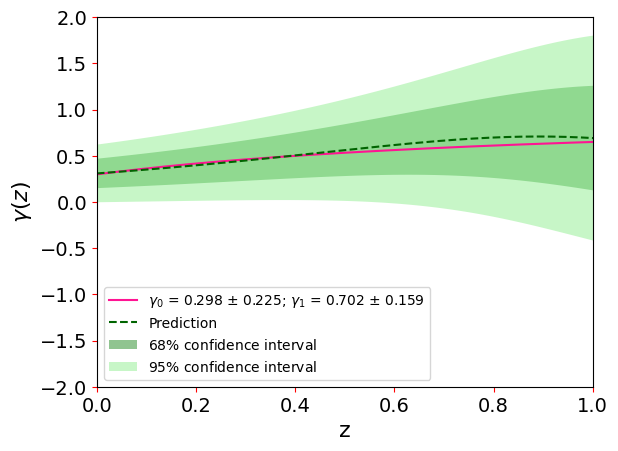

In [156]:
def g(z, g2, g1):

    cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649)

    a = 1/(1+z)

    gg = g2-g1/(1+z)

    return gg

# ajuste da função

popt, pcov = curve_fit(g, z_dhz, gamma_pred, sigma=sigma_g, p0=[0.25,-1.2], bounds=([-1.5, -1.5], [1., 1.]), method='trf')
print(popt[0])
print(popt[1])


p1 = popt[0]
p2 = popt[1]

erro = sigma_g
e1 = erro[0]
e2 = erro[1]

p_0 = p1-p2

e0 = np.sqrt( (1*e1)**2 + (1*e2)**2 )

# plote

#best-fit
zi = np.linspace(min(z_dhz), max(z_dhz), 1000)

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(zi, g(zi, popt[0], popt[1]), color='deeppink', label=r'$\gamma_0$ = '+str(np.round(p_0, 3))+' $\pm$ '+str(np.round(e0, 3))+'; $\gamma_1$ = '+str(np.round(p2, 3))+' $\pm$ '+str(np.round(e2, 3)))


plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, título e eixos
plt.legend(loc='best')
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.savefig('bestfit gamma.pdf')
plt.show()

Logo, o valor para $\gamma(z=0)$ é:

$\gamma_0 = 0.298 \pm 0.225$.

Este valor está a 1.1$\sigma$ de distância do valor encontrado pelo modelo $\Lambda$CDM.

In [158]:
# cálculo do xi2 reduzido: quanto mais próximo de 1, maior a concordância entre as distribuições observadas e esperadas

xi2 = np.sum(( (gamma_pred - g(z_dhz, *popt)) / sigma_g) ** 2)
df = len(z_dhz) - 2
print(xi2/df)

0.029568568993863942
